# Fraud detection for credit card

Solution: Fraud detection is one of the most important problem in banking sector and financial organization which contributes in detecting and classifying inherent fraudulent transactions and eliminate liquidity risk

This project applied Machine learning algorithms to predict fraudulent transactions for credit cards of clients (Binary problem = Fraud/ Non-fraud)

Requirement: Based on attributes of client to classify these transactions into 2 groups 0| Non-fraud - 1| Fraud

Dataset:
- Data source: Kaggle 
- 284.807 transactions with 492 transactions that are labeled fraud tag
- 31 attributes. Due to confidentiality reason, 28 attributes are encrypted by PCA. Only "Time" and "Amount" are provided with raw data

In [2]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


In [3]:
#Import data
df=pd.read_csv('D:\Vcreme\Data science\Project\Fraud Detection\Data\creditcard.csv')

# I. EDA

# 1. Data loading

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Data exploration

In [4]:
#2.1) Data type explotation => Tất cả dữ liệu phải là dạng numeric. Nếu không phải tiến hành Phân tích, binning và label data trước
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# 2.2) Data information exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284804 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284805 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# 2.3) Dataset description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848040e+05,2.848070e+05,2.848070e+05,2.848060e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-5.272497e-07,8.316234e-13,1.592013e-13,-3.892579e-07,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516261e+00,1.415869e+00,1.380247e+00,1.332273e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903727e-01,-8.486401e-01,-6.915971e-01,-7.682958e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798484e-01,-1.984653e-02,-5.433583e-02,-2.741872e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027193e+00,7.433413e-01,6.119264e-01,3.985671e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing data resolve

In [7]:
# Missing data check
df.isnull().sum()

Time      0
V1        0
V2        0
V3        3
V4        0
V5        0
V6        1
V7        0
V8        0
V9        0
V10       0
V11       0
V12       2
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Replace missting data

# Xóa dòng dữ liệu có missing: 
    #data=df.dropna(axis=0) or data=df.dropna(subset=['Column_Name','Column_Name'])
    
# Thay thế bằng một giá trị cố định: 
    #data=df.fillna(value)
    
# Thay thế bằng giá trị liền trước: 
    #data=df.fillna(method='pad')
    
# Thay thế bằng giá trị liền sau: 
    #data=df.fillna(method='bfill')
    
# Thay thế bằng giá trị nội suy:
data= df.interpolate()

In [9]:
# Check the missing data after replacment
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature scaling

In [10]:
# Let’s apply scaling techniques on the “Amount” feature to transform the range of values.
# We drop the original “Amount” column and add a new column with the scaled values.

scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount"], inplace= True, axis= 1)
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


# Imlanced in the data

In [11]:
# Amount details for Fraudulent Transaction
fraud=data[data.Class==1]
fraud.Class.describe()

count    492.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Class, dtype: float64

In [12]:
# Amount details for Non-fraudulent Transaction
nonFraud=data[data.Class==0]
nonFraud.Class.describe()

count    284315.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Class, dtype: float64

In [13]:
# Imlanced in the data 

n1=len(fraud['Class'])
n2=len(nonFraud['Class'])
fraud_percent = (n1 / (n1+n2)) * 100

print("Number of Non-fraud transactions: ", n1)
print("Number of Fraud transactions: ", n2)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Non-fraud transactions:  492
Number of Fraud transactions:  284315
Percentage of Fraud transactions: 0.1727


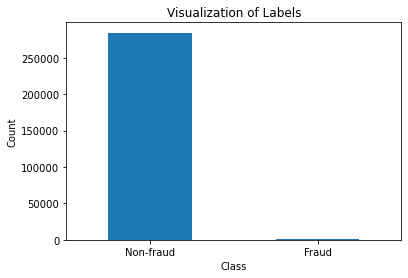

In [14]:
# Plot Fraud và Non-fraud data

labels = ["Non-fraud", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

# Drop column as it is irrelevant (Time)

In [15]:
# 5.1) Drop column Time

data.drop('Time',axis='columns')
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


# 3. Data visualization

In [16]:
# Function of scatter plot

def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

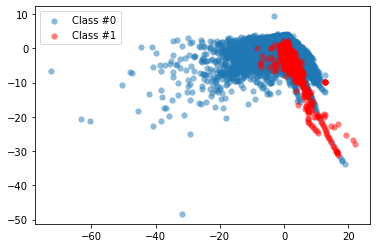

In [17]:
# Chart of Fraud and NonFraud datasets

X=data.iloc[:,2:30].values
Y=data.Class.values
plot_data(X,Y)

# Plotting Correlation Matrix

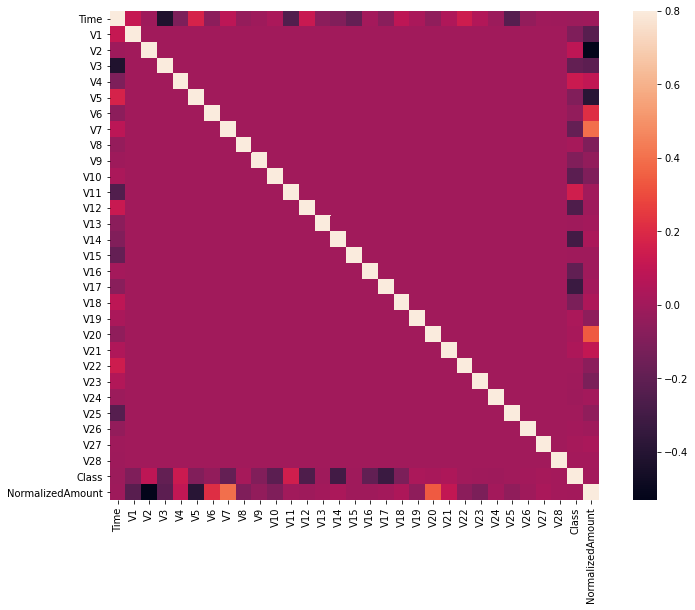

In [18]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#Most of variables are not correlated together

# Binning for continuous variables

In [4]:
# Sort Amount variable
df1=df.copy()
Amt = df1.loc[:,'Amount']
Amt=Amt.T
Amt = np.sort(Amt)
print(Amt)

[    0.       0.       0.   ... 18910.   19656.53 25691.16]


In [5]:
# Description Amount variable
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

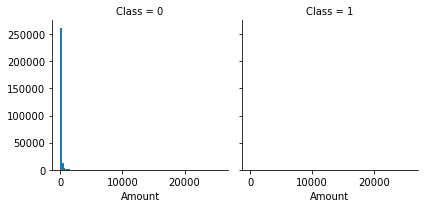

In [6]:
# Histogram chart for Amount variable
g = sns.FacetGrid(df1, col='Class')
g.map(plt.hist, 'Amount', bins=100)

In [8]:
# Divide Amount variable into 2 bins
n=2
df1['AmountBand'] = pd.cut(df1['Amount'], n)


df1[['AmountBand', 'Class']].groupby(['AmountBand'], as_index=False).mean().sort_values(by='AmountBand', ascending=True)

,AmountBand,Class
0,"(-25.691, 12845.58]",0.001728
1,"(12845.58, 25691.16]",0.000000


In [9]:
# Replace binning value for Amount variable in training datasets
df1.loc[ (df1['Amount'] >= 0) & (df1['Amount'] <= 12845.58), 'Amount'] = 1
df1.loc[(df1['Amount'] > 12845.58) & (df1['Amount'] <= 25691.16), 'Amount'] = 2

df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountBand
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.0,0,"(-25.691, 12845.58]"
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.0,0,"(-25.691, 12845.58]"
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.0,0,"(-25.691, 12845.58]"
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.0,0,"(-25.691, 12845.58]"
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,1.0,0,"(-25.691, 12845.58]"


# 4 Data preparation

# Split Train and Test

In [19]:
#  Split train and test datasets with ration 80:20
# Tập features input (Independent variables):    X=data.iloc[:,2:30].values
# Tập output (Dependent variables):              Y=data.Class.values

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.2, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (227845, 28)
Shape of test_X:  (56962, 28)


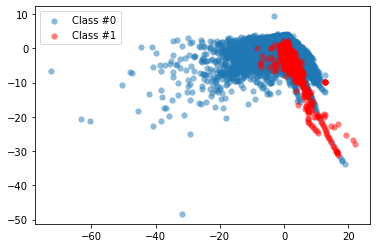

In [20]:
#  Plot the sample data

plot_data(X,Y)

# Resampling to avoid the imlance between Fraud and Non-fraud

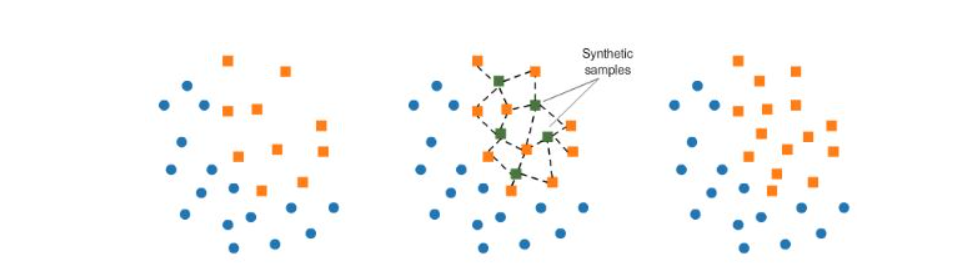


- Thư viện của phương pháp over sampling SMOTE: from imblearn.over_sampling import SMOTE
- Take random  draws from the fraud cases and copy those observations to increase the amount of fraud samples
- Use characteristics of nearest neibors of fraud cases to create new synthetic fraud cases
- Avoids duplicating obserations
- Only works well if the minority case features are similar

In [21]:

# Resample by SMOTE method
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)



Resampled shape of X:  (568630, 28)
Resampled shape of Y:  (568630,)
Counter({0: 284315, 1: 284315})


In [22]:
# Split Train and Test datasets after Resampling

(train_reX, test_reX, train_reY, test_reY) = train_test_split(X_resampled, Y_resampled, test_size= 0.2, random_state= 42)

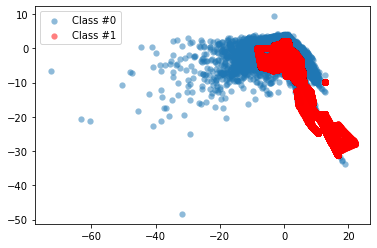

In [23]:
# Plot the resampled data

plot_data(X_resampled, Y_resampled)

# Compare SMOTE to original data

In [24]:
# Original Y
pd.value_counts(pd.Series(Y))

0    284315
1       492
dtype: int64

In [25]:
# Y_resample
pd.value_counts(pd.Series(Y_resampled))

0    284315
1    284315
dtype: int64

In [26]:
# 3.3) Function to compare SMOTE and orginal data
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    '''
    Function to draw plot to compare SMOTH and original data
    '''
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

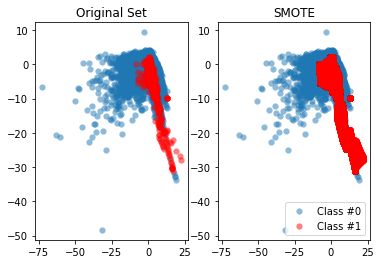

In [27]:

compare_plot (X, Y, X_resampled, Y_resampled, method='SMOTE')

# 5. Train and Evaluate Model on resampled Train and Test 

In [31]:
#Function to calculate evaluate metric of Decision Tree and Random Forest
def metrics(actuals, predictions):
    '''
    Function to calculate evaluation metric of Classification algorithms
    '''
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

# 5.1.  Decision Trees Algorithm

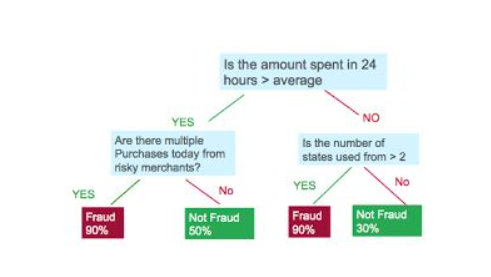

- Commonly used for fraud detection
- Transparent results, easily interpreted by analysts
- Decision trees are prone to overfit the data

In [29]:
# Training model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_reX, train_reY)

#Predict test_reX by Trained model
predictions_dt = decision_tree.predict(test_reX)

#Calculate Decision Tree Score
decision_tree_score = decision_tree.score(test_reX, test_reY) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  100.0


In [40]:
#Evaluate Confusion matrix
confusion_matrix_dt = confusion_matrix(test_reY, predictions_dt.round())

print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[56750     0]
 [    0 56976]]


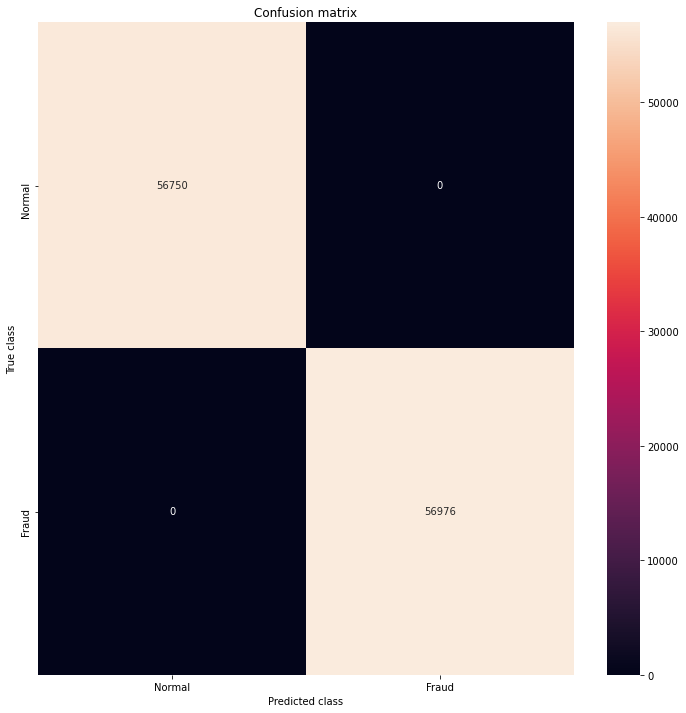

In [42]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_dt, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [55]:
# Metrics
print("Evaluation of Decision Tree Model")
print()
metrics(test_reY, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000


In [57]:
# 1.5) Obtain model probabilities
#probs = decision_tree.predict_proba(test_reX)

# Print ROC_AUC score using probabilities
#print(metrics.roc_auc_score(test_reX, probs[:, 1]))

# 5.2. Random Forest algorithm

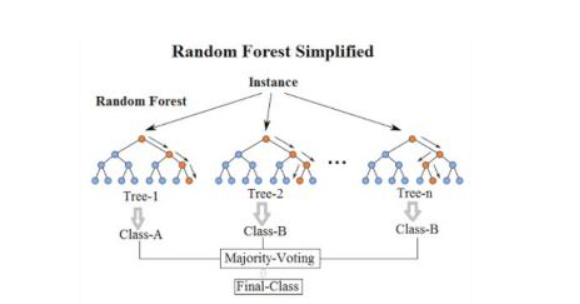

Random Forests are a more robust option than a single decision tree
- Construct a multitude of decision trees when training the model and outputting the class that is the mode or mean predicted class of the individual trees
- A random forest consists of a collection of trees on a random subset of features
- Final predictions are the combined results of those trees
- Random forests can handle complex data and are not prone to overfit
- They are interpretable by looking at feature importance, and can be adjusted to work well on highly imbalanced data
- Their drawback is they're computationally complex
- Very popular for fraud detection
- A Random Forest model will be optimized in the exercises

In [45]:
# Training Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_reX, train_reY)
predictions_rf = random_forest.predict(test_reX)
random_forest_score = random_forest.score(test_reX, test_reY) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  100.0


In [46]:
# Evaluate Confusion matrix
confusion_matrix_rf = confusion_matrix(test_reY, predictions_rf.round())

print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[56750     0]
 [    0 56976]]


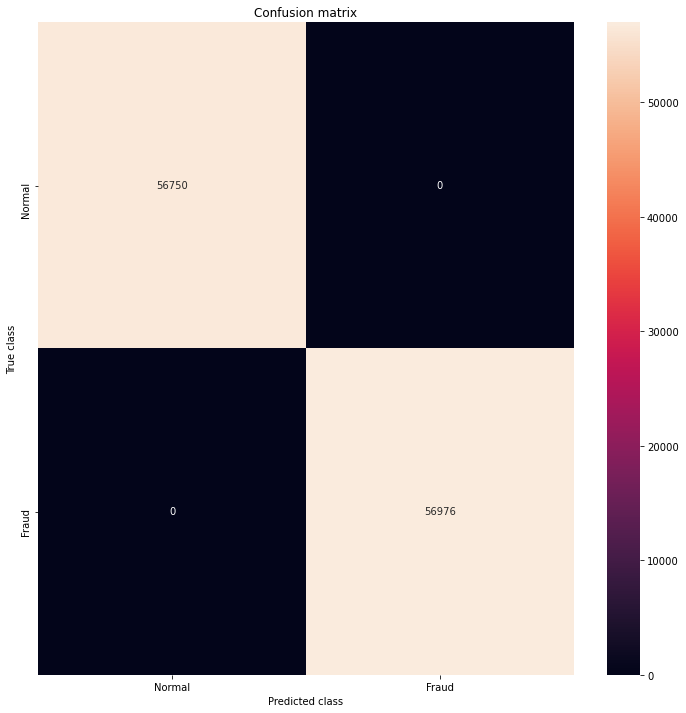

In [47]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_rf, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [59]:
#Metrics
print("Evaluation of Random Forest Model")
print()
metrics(test_reY, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000


# 5.3. LogisticRegression

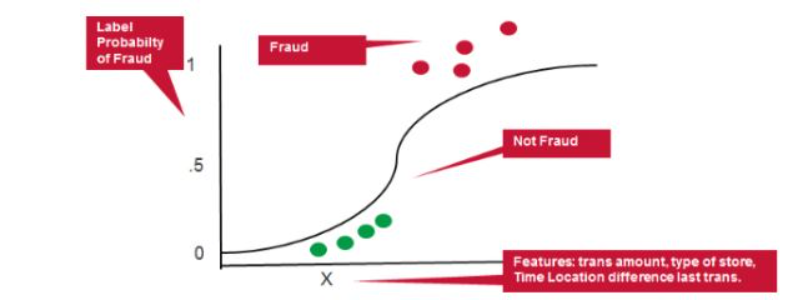

Can be adjusted reasonably well to work on imbalanced data...useful for fraud detection

In [62]:
# Training model Logistic Regression
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_reX, train_reY)

# Predict test_reX with trained model
predictions_lg=logreg.predict(test_reX)

In [63]:
# Evaluate Confusion matrix
confusion_matrix_lg = confusion_matrix(test_reY, predictions_lg.round())

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lg)

Confusion Matrix - Logistic Regression
[[56750     0]
 [    0 56976]]


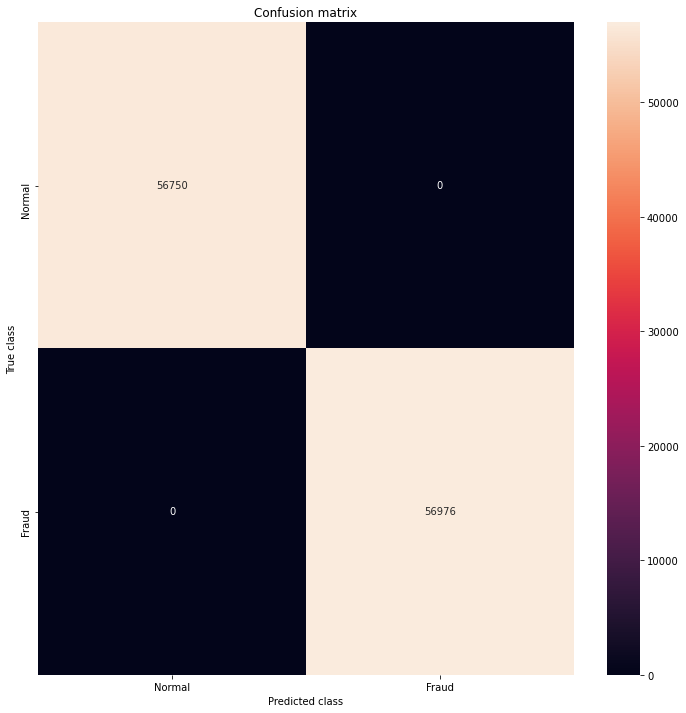

In [64]:
# Plot confusion matrix
LABELS = ['Normal', 'Fraud']
plt.figure(figsize =(12, 12))
sns.heatmap(confusion_matrix_lg, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [65]:
# Metrics
print("Evaluation of Logistic Regression Model")
print()
metrics(test_reY, predictions_lg.round())

Evaluation of Logistic Regression Model

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000


All usage algorithms provided the high accuracy for the model.
However, the training time for Random Forest is highest and Logistic Regression is lowest